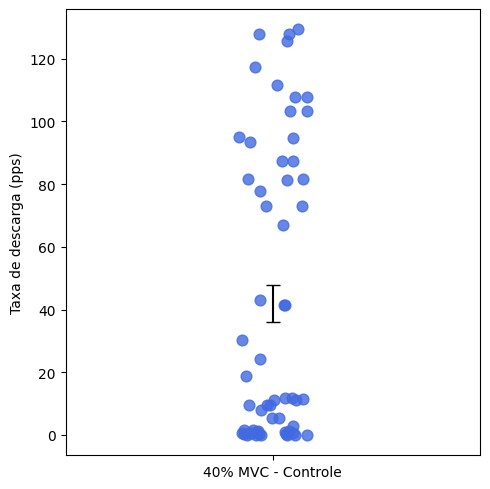

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('./../')
from src.functions import plot_disparos_neuronios

# Leitura dos dados
data = pd.read_csv(f'./spikedata2.Umax=2000/Ca_cell_spike_ref_440_Umax=2000.csv', delimiter=',')
data['spike_time'] = data['spike_time'].str.replace(' ms', '').astype('float')
data = data.values

# Definir intervalo de estado estacionário
t_start, t_end = 4500, 54500  # ms
window_duration = (t_end - t_start) / 1000  # s

# Filtrar dados da fase de estado estacionário
steady_data = data[(data[:, 1] >= t_start) & (data[:, 1] <= t_end)]

# Seleção dos neurônios
unique_neurons = np.unique(data[:, 0])
selected_neurons = np.random.choice(unique_neurons, size=59)

# Calcular taxa de disparo (spikes/s)
firing_rates = []
for neuron in selected_neurons:
    n_spikes = np.sum(steady_data[:, 0] == neuron)
    fr = n_spikes / window_duration
    firing_rates.append(fr)

# Plot agrupado
x_pos = 0  # posição fixa no eixo X
jitter = np.random.uniform(-0.05, 0.05, size=len(firing_rates))  # jitter discreto

plt.figure(figsize=(5, 5))
plt.scatter(np.full(len(firing_rates), x_pos) + jitter, firing_rates, color='royalblue', alpha=0.8, s=60)

# Média e erro padrão
mean_fr = np.mean(firing_rates)
sem_fr = np.std(firing_rates) / np.sqrt(len(firing_rates))
plt.plot(x_pos, mean_fr, '-', color='black', markersize=8)
plt.errorbar(x_pos, mean_fr, yerr=sem_fr, color='black', capsize=5)

# Customização do gráfico
plt.xticks([x_pos], ['40% MVC - Controle'])
plt.ylabel('Taxa de descarga (pps)')
plt.xlim(-0.3, 0.3)  # zoom horizontal para manter os pontos agrupados
plt.tight_layout()
plt.show()

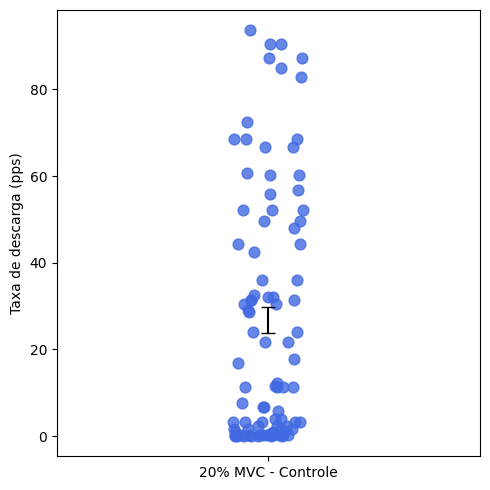

In [6]:
#grafico para Umax=1600
# Leitura dos dados
data = pd.read_csv(f'./spikedata2.Umax=1600/Ca_cell_spike_ref_220_Umax=1600.csv', delimiter=',')
data['spike_time'] = data['spike_time'].str.replace(' ms', '').astype('float')
data = data.values

# Definir intervalo de estado estacionário
t_start, t_end = 4500, 54500  # ms
window_duration = (t_end - t_start) / 1000  # s

# Filtrar dados da fase de estado estacionário
steady_data = data[(data[:, 1] >= t_start) & (data[:, 1] <= t_end)]

# Seleção dos neurônios
unique_neurons = np.unique(data[:, 0])
selected_neurons = np.random.choice(unique_neurons, size=90)

# Calcular taxa de disparo (spikes/s)
firing_rates = []
for neuron in selected_neurons:
    n_spikes = np.sum(steady_data[:, 0] == neuron)
    fr = n_spikes / window_duration
    firing_rates.append(fr)

# Plot agrupado
x_pos = 0  # posição fixa no eixo X
jitter = np.random.uniform(-0.05, 0.05, size=len(firing_rates))  # jitter discreto, não deixa os pontos aglomerados

plt.figure(figsize=(5, 5))
plt.scatter(np.full(len(firing_rates), x_pos) + jitter, firing_rates, color='royalblue', alpha=0.8, s=60)

# Média e erro padrão
mean_fr = np.mean(firing_rates)
sem_fr = np.std(firing_rates) / np.sqrt(len(firing_rates))
plt.plot(x_pos, mean_fr, '-', color='black', markersize=8)
plt.errorbar(x_pos, mean_fr, yerr=sem_fr, color='black', capsize=5)

# Customização do gráfico
plt.xticks([x_pos], ['20% MVC - Controle'])
plt.ylabel('Taxa de descarga (pps)')
plt.xlim(-0.3, 0.3)  # zoom horizontal para manter os pontos agrupados
plt.tight_layout()
plt.show()

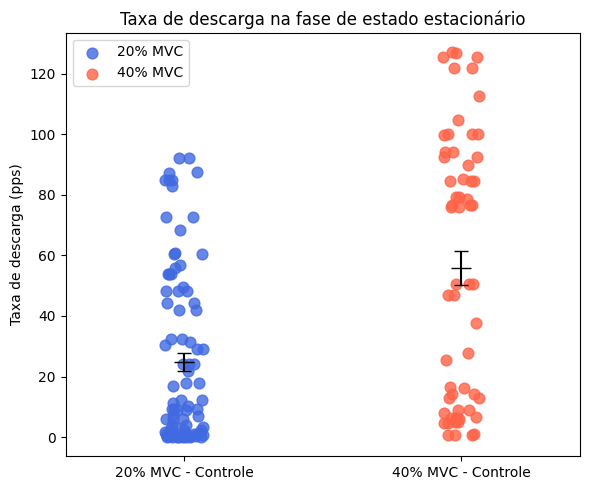

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('./../')
from src.functions import plot_disparos_neuronios

# === Leitura dos dados ===
data = pd.read_csv(f'./spikedata2.Umax=1600/Ca_cell_spike_ref_220_Umax=1600.csv', delimiter=',')
data['spike_time'] = data['spike_time'].str.replace(' ms', '').astype('float')
data = data.values

data1 = pd.read_csv(f'./spikedata2.Umax=1600/Ca_cell_spike_ref_440_Umax=1600.csv', delimiter=',')
data1['spike_time'] = data1['spike_time'].str.replace(' ms', '').astype('float')
data1 = data1.values 

# === Intervalos de estado estacionário ===
# 20% MVC
t_start_20, t_end_20 = 4500, 54500  # ms
window_20 = (t_end_20 - t_start_20) / 1000  # s
steady_data_20 = data[(data[:, 1] >= t_start_20) & (data[:, 1] <= t_end_20)]

# 40% MVC
t_start_40, t_end_40 = 4500, 54500  # ms 
window_40 = (t_end_40 - t_start_40) / 1000  # s
steady_data_40 = data1[(data1[:, 1] >= t_start_40) & (data1[:, 1] <= t_end_40)]

# === Seleção de neurônios ===
unique_neurons = np.unique(data[:, 0])
neurons_20 = np.random.choice(unique_neurons, size=90)
neurons_40 = np.random.choice(unique_neurons, size=59)

# === Calcular taxa de disparo (spikes/s) ===
# 20%
fr_20 = []
for neuron in neurons_20:
    n_spikes = np.sum(steady_data_20[:, 0] == neuron)
    fr = n_spikes / window_20
    fr_20.append(fr)

# 40%
fr_40 = []
for neuron in neurons_40:
    n_spikes = np.sum(steady_data_40[:, 0] == neuron)
    fr = n_spikes / window_40
    fr_40.append(fr)

# === Plot ===
plt.figure(figsize=(6, 5))

# Posições no eixo X
x_20 = 0
x_40 = 0.7

# Jitter
jitter_20 = np.random.uniform(-0.05, 0.05, size=len(fr_20))
jitter_40 = np.random.uniform(-0.05, 0.05, size=len(fr_40))

# Pontos
plt.scatter(np.full(len(fr_20), x_20) + jitter_20, fr_20, color='royalblue', alpha=0.8, s=60, label='20% MVC')
plt.scatter(np.full(len(fr_40), x_40) + jitter_40, fr_40, color='tomato', alpha=0.8, s=60, label='40% MVC')

# Médias e barras de erro
mean_20 = np.mean(fr_20)
sem_20 = np.std(fr_20) / np.sqrt(len(fr_20))
plt.errorbar(x_20, mean_20, yerr=sem_20, fmt='_', color='black', capsize=5, markersize=14, elinewidth=1.5)

mean_40 = np.mean(fr_40)
sem_40 = np.std(fr_40) / np.sqrt(len(fr_40))
plt.errorbar(x_40, mean_40, yerr=sem_40, fmt='_', color='black', capsize=5, markersize=14, elinewidth=1.5)

# Customizações
plt.xticks([x_20, x_40], ['20% MVC - Controle', '40% MVC - Controle'])
plt.ylabel('Taxa de descarga (pps)')
plt.title('Taxa de descarga na fase de estado estacionário')
plt.xlim(-0.3, 1.0)
plt.legend()
plt.tight_layout()
plt.show()


[29. 52. 35. 33. 71. 44. 83.  0. 55. 35. 21.]
[40. 75. 13. 39. 94. 83. 74. 52. 93.]


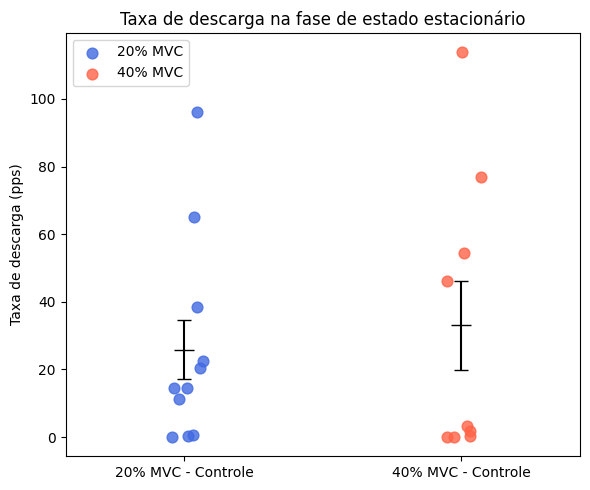

In [8]:

data = pd.read_csv(f'./spikedata2.Umax=2400/Ca_cell_spike_ref_220_Umax=2400.csv', delimiter=',')
data['spike_time'] = data['spike_time'].str.replace(' ms', '').astype('float')
data = data.values

data1 = pd.read_csv(f'./spikedata2.Umax=2400/Ca_cell_spike_ref_440_Umax=2400.csv', delimiter=',')
data1['spike_time'] = data1['spike_time'].str.replace(' ms', '').astype('float')
data1 = data1.values 

# === Intervalos de estado estacionário ===
# 20% MVC
t_start_20, t_end_20 = 4500, 54500  # ms
window_20 = (t_end_20 - t_start_20) / 1000  # s
steady_data_20 = data[(data[:, 1] >= t_start_20) & (data[:, 1] <= t_end_20)]

# 40% MVC
t_start_40, t_end_40 = 4500, 54500  # ms 
window_40 = (t_end_40 - t_start_40) / 1000  # s
steady_data_40 = data1[(data1[:, 1] >= t_start_40) & (data1[:, 1] <= t_end_40)]

# === Seleção de neurônios ===
unique_neurons = np.unique(data[:, 0])
unique_neurons1= np.unique(data1[:, 0])
neurons_20 = np.random.choice(unique_neurons, size=11, replace=True)
print(neurons_20)
neurons_40 = np.random.choice(unique_neurons1, size=9, replace=True)
print(neurons_40)

# === Calcular taxa de disparo (spikes/s) ===
# 20%
fr_20 = []
for neuron in neurons_20:
    n_spikes = np.sum(steady_data_20[:, 0] == neuron)
    fr = n_spikes / window_20
    fr_20.append(fr)

# 40%
fr_40 = []
for neuron in neurons_40:
    n_spikes = np.sum(steady_data_40[:, 0] == neuron)
    fr = n_spikes / window_40
    fr_40.append(fr)

# === Plot ===
plt.figure(figsize=(6, 5))

# Posições no eixo X
x_20 = 0
x_40 = 0.7

# Jitter
jitter_20 = np.random.uniform(-0.05, 0.05, size=len(fr_20))
jitter_40 = np.random.uniform(-0.05, 0.05, size=len(fr_40))

# Pontos
plt.scatter(np.full(len(fr_20), x_20) + jitter_20, fr_20, color='royalblue', alpha=0.8, s=60, label='20% MVC')
plt.scatter(np.full(len(fr_40), x_40) + jitter_40, fr_40, color='tomato', alpha=0.8, s=60, label='40% MVC')

# Médias e barras de erro
mean_20 = np.mean(fr_20)
sem_20 = np.std(fr_20) / np.sqrt(len(fr_20))
plt.errorbar(x_20, mean_20, yerr=sem_20, fmt='_', color='black', capsize=5, markersize=14, elinewidth=1.5)

mean_40 = np.mean(fr_40)
sem_40 = np.std(fr_40) / np.sqrt(len(fr_40))
plt.errorbar(x_40, mean_40, yerr=sem_40, fmt='_', color='black', capsize=5, markersize=14, elinewidth=1.5)

# Customizações
plt.xticks([x_20, x_40], ['20% MVC - Controle', '40% MVC - Controle'])
plt.ylabel('Taxa de descarga (pps)')
plt.title('Taxa de descarga na fase de estado estacionário')
plt.xlim(-0.3, 1.0)
plt.legend()
plt.tight_layout()
plt.show()
